In [124]:
#manage image array
import cv2
import numpy as np
import cairo


#manage and visualize data
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

#metrics
import sklearn
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_absolute_error
from sklearn.preprocessing import MultiLabelBinarizer

#others
import ast

# results

## results on yolo

In [ ]:
#results1.csv training logs:no logs model was trained on colab   model:yolov8 m num_imgs:5000 epoch=10

#results2.csv training logs:/Users/kunkerdthaisong/ipu/intern/runs/detect/train7/results.csv unfinished model:yolov8 m num_imgs:10000 epoch=5

#results3.csv training logs:/Users/kunkerdthaisong/ipu/intern/runs/detect/train4/results.png model:yolov8 s num_imgs:5000 epoch=15

#results4.csv training logs:/Users/kunkerdthaisong/ipu/intern/runs/detect/train9/results.png model:yolov8 s num_imgs:1000 epoch=15

## evaluate the evaluate set with metrics

In [154]:
ground_truth_df=pd.read_csv("/Users/kunkerdthaisong/ipu/intern/ground_truth.csv")
ground_truth_df["counts"]=ground_truth_df["counts"].apply(lambda x:x.replace(' ', ',')).apply(lambda x:ast.literal_eval(x))  #ex eval_df["counts"][0] is '[1 1 2]' so turn it to list

res_df1=pd.read_csv("/Users/kunkerdthaisong/ipu/intern/results/results1.csv")
res_df1["counts"]=res_df1["counts"].apply(lambda x:x.replace(' ', ',')).apply(lambda x:ast.literal_eval(x))
res_df2=pd.read_csv("/Users/kunkerdthaisong/ipu/intern/results/results2.csv")
res_df2["counts"]=res_df2["counts"].apply(lambda x:x.replace(' ', ',')).apply(lambda x:ast.literal_eval(x))
res_df3=pd.read_csv("/Users/kunkerdthaisong/ipu/intern/results/results3.csv")
res_df3["counts"]=res_df3["counts"].apply(lambda x:x.replace(' ', ',')).apply(lambda x:ast.literal_eval(x))
res_df4=pd.read_csv("/Users/kunkerdthaisong/ipu/intern/results/results4.csv")
res_df4["counts"]=res_df4["counts"].apply(lambda x:x.replace(' ', ',')).apply(lambda x:ast.literal_eval(x))


mlb = MultiLabelBinarizer()
mlb.fit(np.asarray(pd.concat([ground_truth_df["counts"],res_df1["counts"],res_df2["counts"],res_df3["counts"],res_df4["counts"]])))
gt_arr=mlb.transform(np.asarray(ground_truth_df["counts"]))


re_arr1=mlb.transform(np.asarray(res_df1["counts"]))
re_arr2=mlb.transform(np.asarray(res_df2["counts"]))
re_arr3=mlb.transform(np.asarray(res_df3["counts"]))
re_arr4=mlb.transform(np.asarray(res_df4["counts"])) 

acc_=[accuracy_score(gt_arr,re_arr1),accuracy_score(gt_arr,re_arr2),accuracy_score(gt_arr,re_arr3),accuracy_score(gt_arr,re_arr4)]
mae_=[mean_absolute_error(gt_arr,re_arr1),mean_absolute_error(gt_arr,re_arr2),mean_absolute_error(gt_arr,re_arr3),mean_absolute_error(gt_arr,re_arr4)]

print(accuracy_score(gt_arr,re_arr3),mean_absolute_error(gt_arr,re_arr3))

0.79 0.04666666666666667


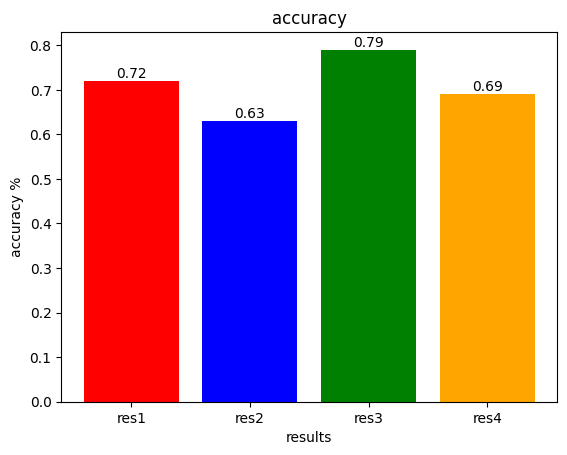

In [155]:
#plot acc

names=["res1","res2","res3","res4"]
colors = ['red', 'blue', 'green', 'orange']

plt.bar(names, acc_, color=colors)

# Adding values on top of each bar
for i, value in enumerate(acc_):
    plt.text(i,y=value,s=str(value), ha='center', va='bottom')

plt.xlabel('results')
plt.ylabel('accuracy %')
plt.title('accuracy')
plt.show()

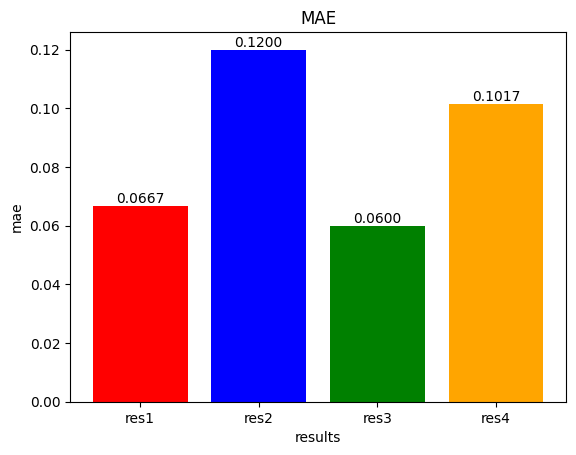

In [151]:
#plot mae

names=["res1","res2","res3","res4"]
colors = ['red', 'blue', 'green', 'orange']

plt.bar(names, mae_, color=colors)

# Adding values on top of each bar
for i, value in enumerate(mae_):
    plt.text(i,y=value,s=str('{:.04f}'.format(value)), ha='center', va='bottom')

plt.xlabel('results')
plt.ylabel('mae')
plt.title('MAE')
plt.show()

# future plan

In [ ]:
#1. Change model
    #1.1 yolov8 s,m,l.
    #1.2 faster_rcnn expects for runtime, consume lower resource for my machine.
    #1.3 dinov2  expects for performace score.
#2. generate more data like 10000*5 images
#3. fine generate
    #3.1 Make rule when generate imgs some shapes cannot be fully obscured B/C some circle was predicted to be square the reson is some circle is in the square and model learn it.
    #3.2 Generate triangle by ratio h/w ==1.3
#4. change machine for train model